In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/TUGAS AKHIR/SKRIPSI/DATA SET/FIX/DataLabeling3000.csv")
data

,Unnamed: 0.1,Unnamed: 0,full_text,Sentiment
0,0,0,tuju soal aman ekonomi ri ya liat skala masif ...,Negative
1,1,1,kalo saldi isra kata krn banyak adil yanghande...,Negative
2,2,2,beres masalah tp tetap picu cibir publik gila ...,Negative
3,3,3,rasa sih sulit buka mata kalo beberapa barang ...,Negative
4,5,5,harus utk beacukai,Negative
...,...,...,...,...
3251,4370,4370,presiden tetap target terima pajak lama tahun ...,Negative
3252,4371,4371,open unlock imei beacukai amp kemenprin perman...,Positive
3253,4372,4372,pantess bea cukai peg nya kaya jahanam kalian ...,Negative
3254,4374,4374,saya perlu koreksi atur bea cukai pergi keluar...,Negative


In [ ]:
data = data[['full_text', 'Sentiment']]
data

,full_text,Sentiment
0,tuju soal aman ekonomi ri ya liat skala masif ...,Negative
1,kalo saldi isra kata krn banyak adil yanghande...,Negative
2,beres masalah tp tetap picu cibir publik gila ...,Negative
3,rasa sih sulit buka mata kalo beberapa barang ...,Negative
4,harus utk beacukai,Negative
...,...,...
3251,presiden tetap target terima pajak lama tahun ...,Negative
3252,open unlock imei beacukai amp kemenprin perman...,Positive
3253,pantess bea cukai peg nya kaya jahanam kalian ...,Negative
3254,saya perlu koreksi atur bea cukai pergi keluar...,Negative


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['full_text'], data['Sentiment'], test_size=0.15, random_state=42)

In [ ]:
print(f'Jumlah Data Latih: {len(X_train)}')
print(f'Jumlah Data Uji: {len(X_test)}')

Jumlah Data Latih: 2767
Jumlah Data Uji: 489


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
Tfidf_vectorizer = TfidfVectorizer()

# Transformasi data teks menjadi vector TF-IDF
X_train_tfidf = Tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = Tfidf_vectorizer.transform(X_test)

In [ ]:
# Cetak nama fitur dari TF-IDF Vectorizer
feature_names = Tfidf_vectorizer.get_feature_names_out()

# Cetak beberapa contoh hasil transformasi dari data penelitian
print("Hasil transformasi dari data peneltian:")
print(X_test_tfidf)

# Cetak beberapa contoh fitur dari vector TF-IDF
print("\nFitur dari vector TF-IDF:")
print(feature_names)

Hasil transformasi dari data peneltian:
  (0, 6631)	0.3045883046566634
  (0, 6429)	0.2924124511607662
  (0, 3965)	0.26304596872928065
  (0, 3583)	0.6241134046792636
  (0, 3199)	0.3544720111588471
  (0, 1427)	0.09033479882853321
  (0, 1327)	0.2951817011307487
  (0, 909)	0.29811888431808253
  (0, 806)	0.09004481011079776
  (0, 722)	0.2123305047224358
  (1, 6805)	0.1987572762348252
  (1, 5863)	0.14429774146671276
  (1, 5746)	0.13680607018019833
  (1, 5727)	0.4606174055263418
  (1, 5648)	0.23682794090979478
  (1, 4798)	0.18725847013308386
  (1, 4752)	0.18073923198645997
  (1, 4706)	0.21204320552143932
  (1, 3808)	0.2086352170703307
  (1, 3794)	0.31977555647983064
  (1, 3759)	0.18725847013308386
  (1, 3416)	0.23682794090979478
  (1, 2943)	0.20552396737481543
  (1, 2769)	0.19637260510581617
  (1, 810)	0.05726061777181798
  :	:
  (486, 1552)	0.31312977835224964
  (486, 810)	0.0852597328231478
  (486, 796)	0.21607067070685732
  (486, 651)	0.2844330286765854
  (486, 338)	0.1722625882224746
  (4

In [1]:
svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train_tfidf, y_train)

print("Parameter model SVM:")
print(f"Kernel:{svm_model.kernel}")
print(f"C:{svm_model.C}")
print(f"Intercept:{svm_model.intercept_}")
print(f"Suport Vectors: {svm_model.support_vectors_}")

NameError: name 'SVC' is not defined

In [ ]:
# Menguji model pada data pengujian yang sudah di-vetorosasi
y_pred = svm_model.predict(X_test_tfidf)

# Cetak beberapa contoh hasil prediksi
print("Contoh hasil pada data pengujian:")
print(y_pred[:10])

Contoh hasil pada data pengujian:
['Negative' 'Negative' 'Positive' 'Negative' 'Negative' 'Negative'
 'Negative' 'Positive' 'Positive' 'Negative']


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

Akurasi: 0.89


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.89      0.93      0.91       301
    Positive       0.88      0.82      0.85       188

    accuracy                           0.89       489
   macro avg       0.89      0.88      0.88       489
weighted avg       0.89      0.89      0.89       489



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[280  21]
 [ 33 155]]


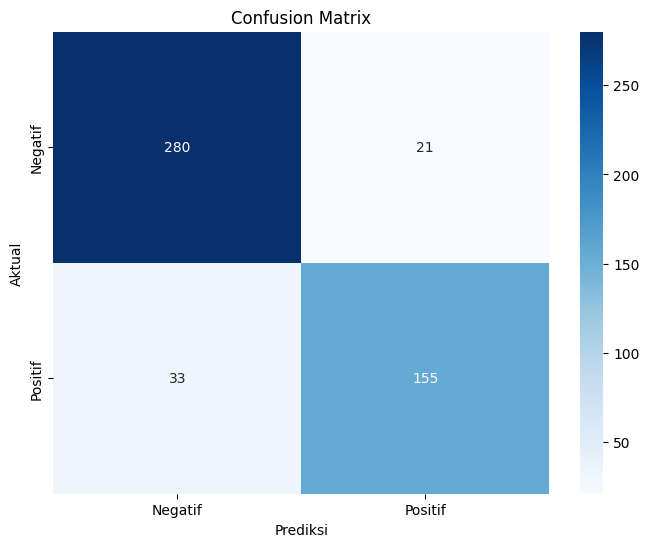

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()